In [1]:
import cairo
from IPython.display import Image, display, SVG
from math import pi
import math
from io import BytesIO
import numpy as np

In [106]:
import random
r = lambda: random.randint(0,255) / 255
rc = lambda: [r(), r(), r(), 0.7]

In [176]:
# I want to be able accept a center, heading, nsides, circle radius.

def draw_inscribed_circle(cr, center, heading, radius, nsides, circle):
    cx, cy = center
    c = cmap[nsides-3]
    cr.set_source_rgba(*c)
    cr.move_to(*center)
    cr.stroke()
    if circle:
        cr.arc(*center, radius, 0, 2*pi)
        cr.stroke()
    incr = math.radians(360/nsides)
    if nsides % 2 == 0:
        heading = heading - math.radians(360/nsides/2)
    
    last_x = cx + np.cos(heading) * radius
    last_y = cy + np.sin(heading) * radius
    for i in range(nsides+1):
        this_x = cx + np.cos(heading+incr*i) * radius
        this_y = cy + np.sin(heading + incr*i) * radius
        cr.move_to(last_x, last_y)
        cr.line_to(this_x, this_y)
        cr.stroke()
        last_x, last_y = this_x, this_y

# Return sets of (center, heading)        
def get_next_sets(cr, center, heading, radius, nsides):
    sets = []
    init_hd = heading# - math.radians(360/nsides/2)
    incr = math.radians(360/nsides)
    for i in range(nsides):
        cr.move_to(*center)
        x = center[0] + np.cos(init_hd + i * incr) * 2*radius
        y = center[1] + np.sin(init_hd + i * incr)*2*radius
        sets.append([(x,y), init_hd + i * incr])
    
    return sets    
    
def recursive_shapes(cr, origin, heading, radius, nsides, circle=True):
    draw_inscribed_circle(cr, center=origin, heading=heading, radius=radius, nsides=nsides, circle=circle)
    if nsides >= 4:
        next_sides = nsides-1
        sets = get_next_sets(cr, center=origin, heading=heading, radius=radius, nsides=nsides)
        for s in sets:
            recursive_shapes(cr, origin=s[0], heading=s[1], radius=radius, nsides=next_sides, circle=circle)
            



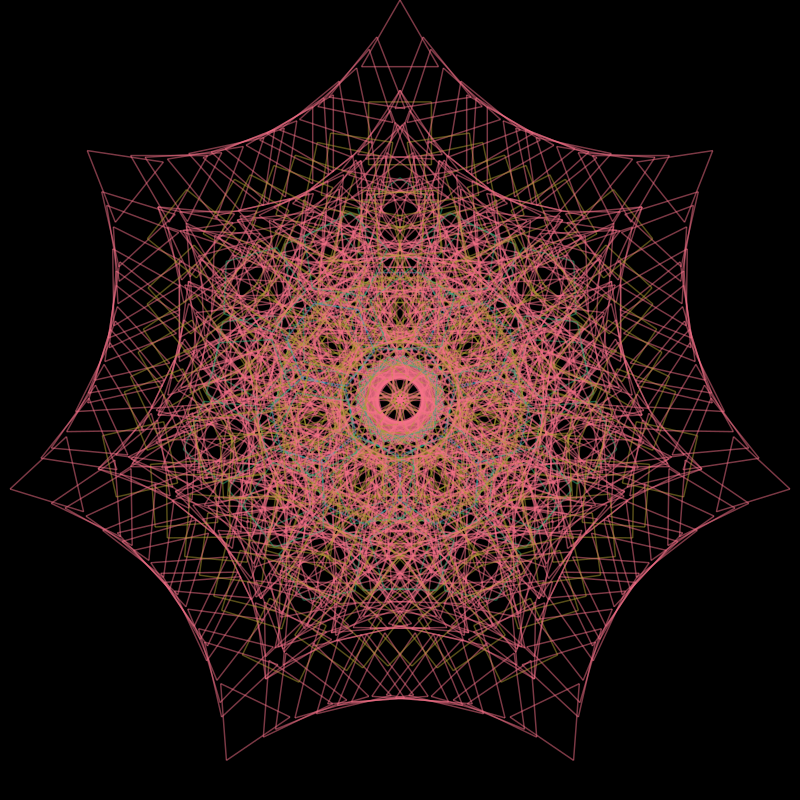

In [182]:
### CHANGE THESE TO MESS WITH THE ART ###

WIDTH = 800
HEIGHT = 800
nsides = 7 # number gte 3. Recommend 7 or less
alpha = 0.5 #alpha channel of the lines. Lower values work better with higher nsides. must be between 0 and 1.
heading = -pi/2 #The direction in radians that the vertex of the center shape will point
palette = 'husl' # a seaborn color palette
draw_circles = False # whether to inscribe shapes in circles
###


cmap = {i:[*c, alpha] for i, c, in enumerate(sns.color_palette(palette, nsides-2))}
radius = 1 / (((nsides-3)*2 + 1) * 2)
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.scale(WIDTH, HEIGHT)

ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(0,0,0)
ctx.fill()

ctx.set_line_width(radius/30)
recursive_shapes(ctx, origin=(0.5,0.5), heading=heading, radius=radius, nsides=nsides, circle=draw_circles)

io = BytesIO()
surface.write_to_png(io)
display(Image(io.getvalue()))